## TASK 51
## - CAPSTONE PROJECT
## - MACHINE LEARNING

In [128]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

#import PCA as PCA2
%matplotlib inline


# Task Instructions :

# ● Use the dataset UsArrests.csv included in this folder to generate a similar in-depth PCA report of the data. Explore as much as you can, motivate the pre-processing steps you take, and interpret the outcomes of any analyses.

In [129]:
# Load the data
df = pd.read_csv("USArrests.csv")

# REVIEW OF THE DATA

In [130]:
# Explore the data
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [131]:
# rename the 'City' column to 'State'
## code from : https://stackoverflow.com/questions/19758364/rename-specific-columns-in-pandas

df.rename(columns={'City':'State'}, inplace=True)
list(df.columns)    #<== # check the output

['State', 'Murder', 'Assault', 'UrbanPop', 'Rape']

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


    - There are no apparent missing values in the above figures.
    - The 'Assault' & 'UrbanPop' values are int64 & the other 2 values are float64.
    - It is not clear if the 'UrbanPop' value is a count of the population size or something different. Does it matter for this task?

CHANGE ALL NUMERICAL DATATYPES TO 'float64' & CONFIRM

In [133]:
df['Assault'] = df['Assault'].astype('float64')
df['UrbanPop'] = df['UrbanPop'].astype('float64')
df.dtypes

State        object
Murder      float64
Assault     float64
UrbanPop    float64
Rape        float64
dtype: object

    Double-check if there are any null/NaN values.

In [134]:
df.isnull().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

    The dataset has no missing values.

    The dataset has 50 rows and 5 columns.

    Columns refer to:-
    - 50 US states
    - Murder
    - Assault
    - Urban Populus
    - Rape


In [135]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


    I can see from the 'mean' value row that the 'Assault' column has the by far, biggest value of 170.76.

    Therefore, 'Assault' is a column value which would dominate the dataset.

In [136]:
# Prepare the data for modeling
X = df.drop("State", axis=1)
y = df["State"]

    Plot the dataset values to get an idea of the correlation and distribution of the values.

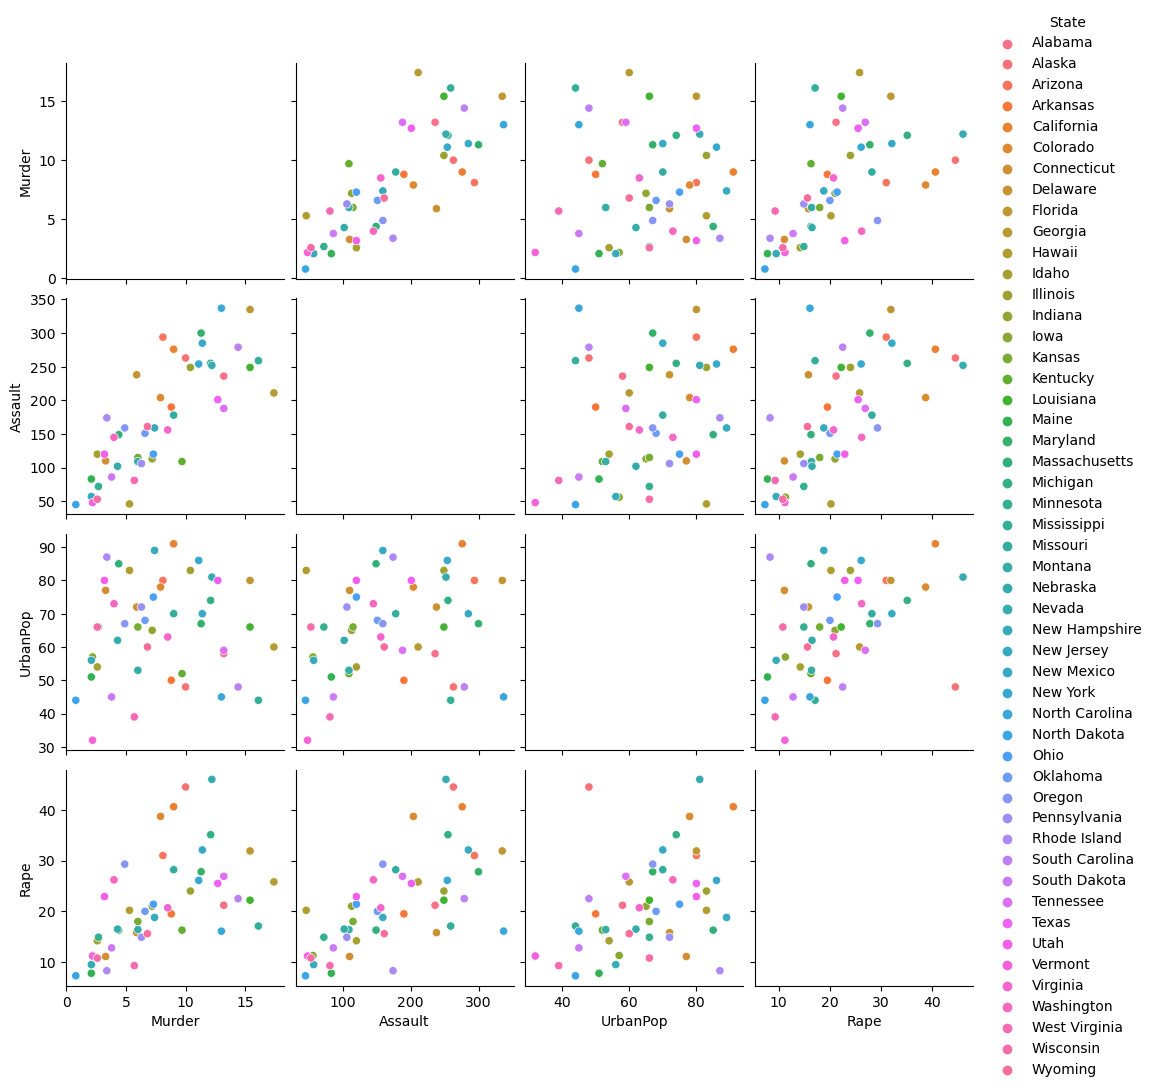

In [137]:
# Plot the data
sns.pairplot(df, hue="State")
plt.show()

    I can see from the above graph that the 'Murder' & 'Assault' columns have a very clear linear correlation.

    The 'UrbanPop' column has not been standardised yet, so this graph may be misleading.

Text(0.5, 1.0, 'Murder Rate by U.S. State [1973]')

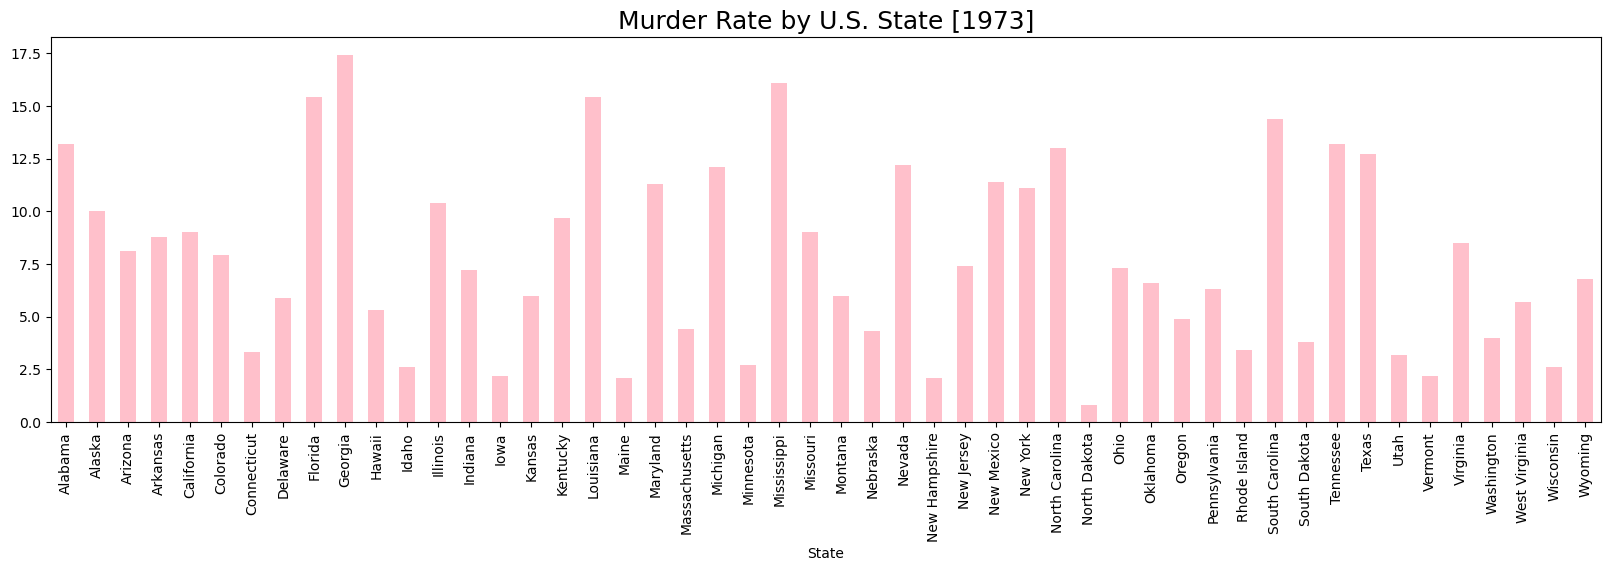

In [138]:
plt.figure(figsize=(20,5))
df.groupby('State')['Murder'].max().plot(kind='bar', color='pink')
plt.title('Murder Rate by U.S. State [1973]', fontsize=18)

    Looking above, I can visually observe that the state of Georgia has the highest murder rate & North Dakota seem to be the lowest.

Text(0.5, 1.0, 'Assault Rate by U.S. State [1973]')

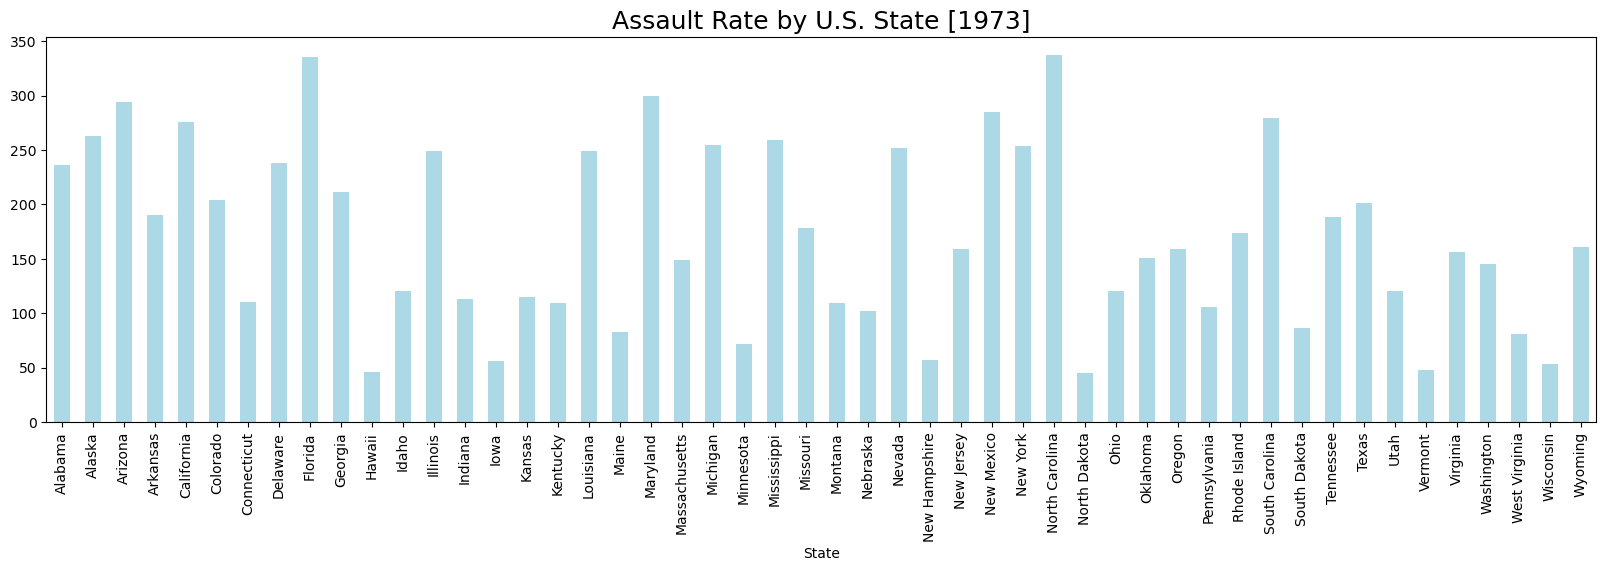

In [139]:
plt.figure(figsize=(20,5))
df.groupby('State')['Assault'].max().plot(kind='bar', color='lightblue')
plt.title('Assault Rate by U.S. State [1973]', fontsize=18)

    Looking above, I can see that Florida state & North Carolina state seem to have the equally highest 'Assault' rate & 'North Dakota' the lowest rate.

Text(0.5, 1.0, 'Rape Rate by U.S. State [1973]')

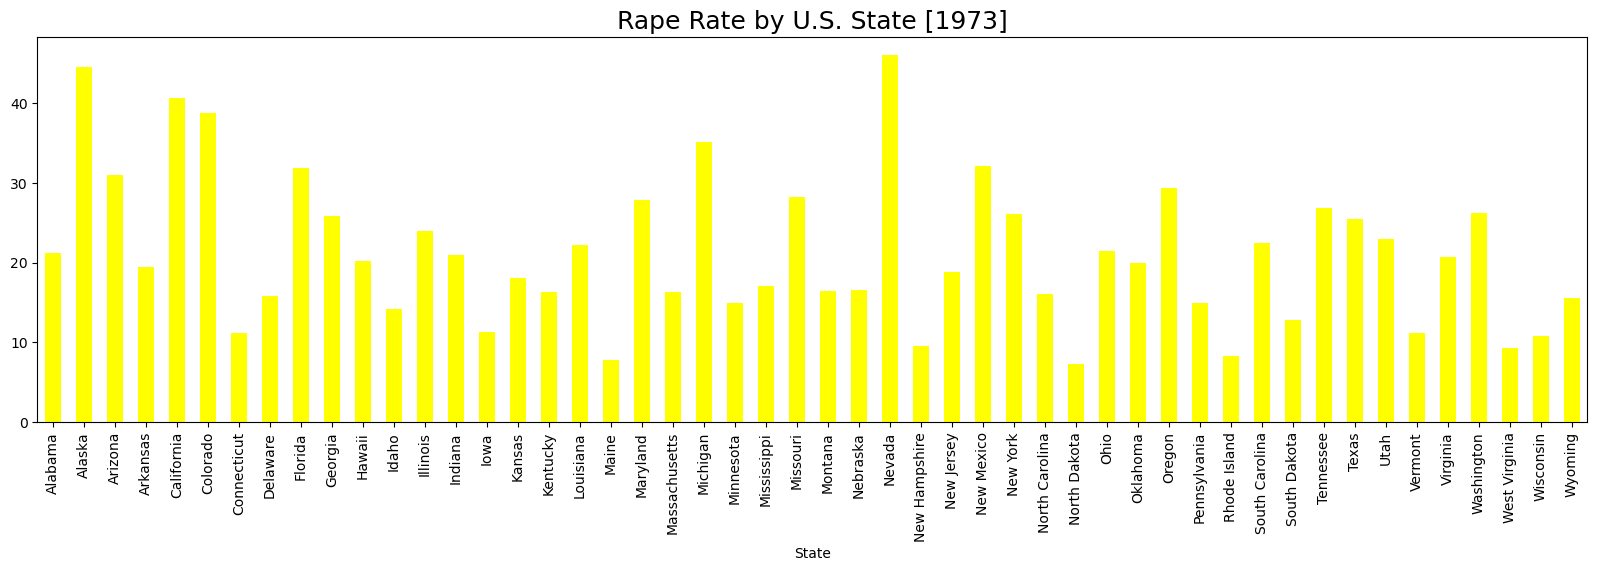

In [140]:
plt.figure(figsize=(20,5))
df.groupby('State')['Rape'].max().plot(kind='bar', color='yellow')
plt.title('Rape Rate by U.S. State [1973]', fontsize=18)

    Looking above, it seems that the state of Nevada has the highest 'Rape' rate & North Dakota has the lowest.

Text(0.5, 1.0, 'Crime Rate per % of the Population in a U.S. State [1973]')

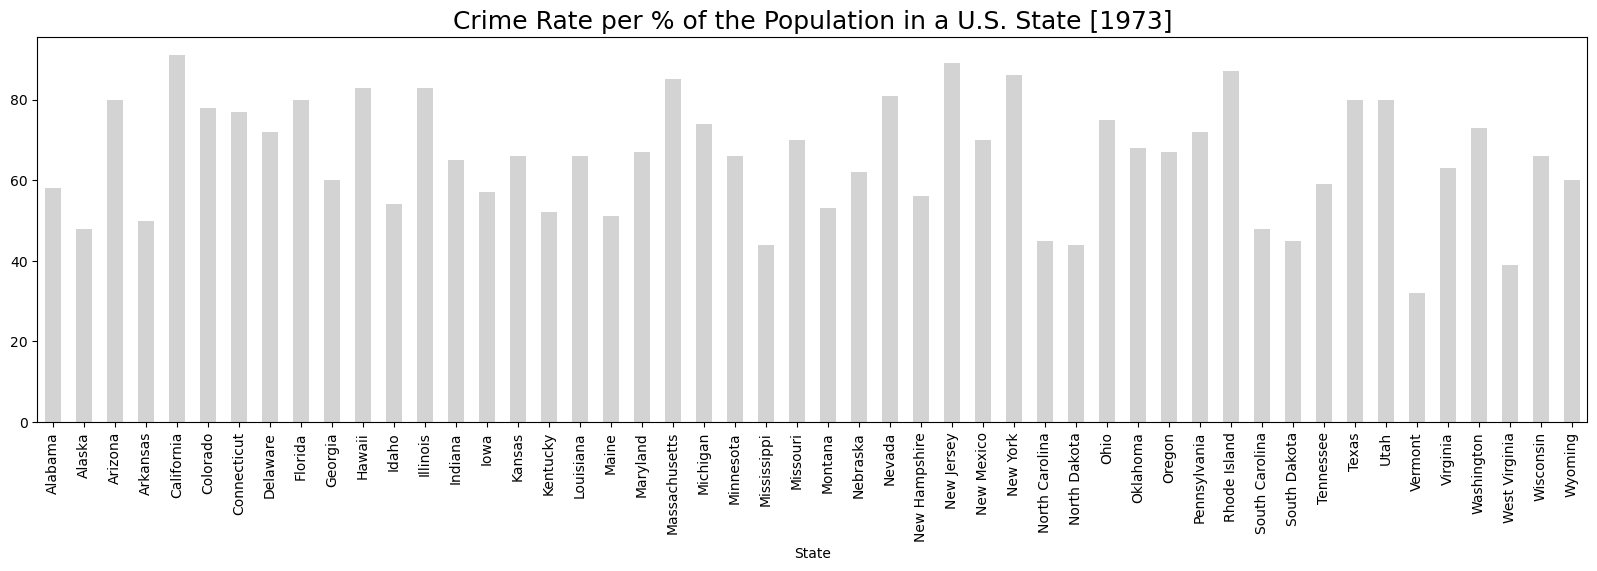

In [141]:
plt.figure(figsize=(20,5))
df.groupby('State')['UrbanPop'].max().plot(kind='bar', color='lightgrey')
plt.title('Crime Rate per % of the Population in a U.S. State [1973]', fontsize=18)

    Looking above at the graph, I can see that although the state of 'North Dakota' appeared to have the lowest crime figures for; 'Murder', 'Assault', and 'Rape', and yet it does not have the lowest crime rate per head of population. Which seems to be counter-intuitive since being at the bottom of the table for crime would suggest that North Dakota is a safe place. North Dakota is relatively safe, but being at the bottom of the table in for absolute values in individual crimes seems to suggest that it has a very small population compared to the other U.S. states.
    
    California appears to have the highest rate of crime per head of population and Vermont appears to have the lowest.

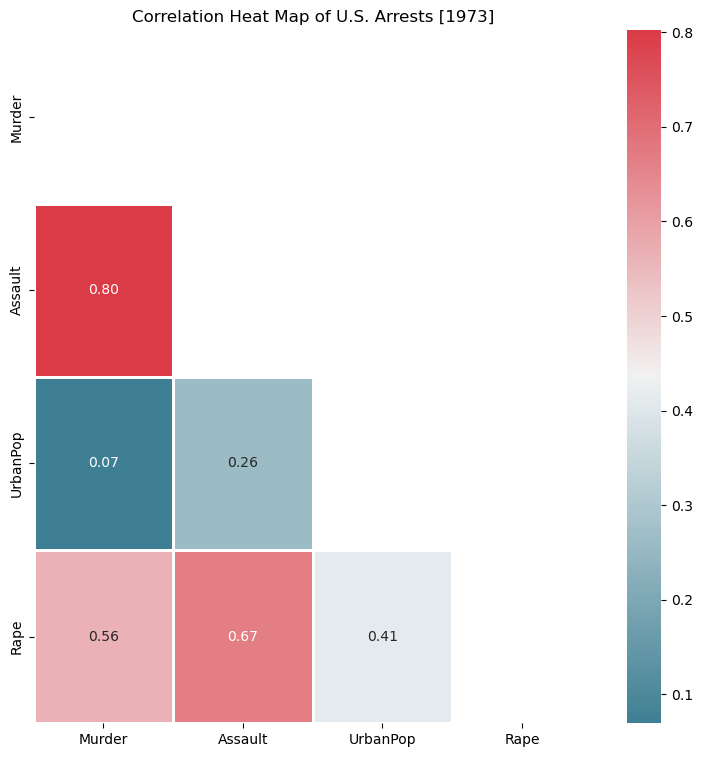

In [142]:
# CODE PROVIDED IN AN EARLIER TASK:

colormap = sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(df):
  # get correlations
  corrs = df.corr()

  # pick appropriate palette for heatmap

  # Plot figsize
  fig, ax = plt.subplots(figsize=(9, 9))

  # to mask mirrored side of heatmap
  dropSelf = np.zeros_like(corrs)
  dropSelf[np.triu_indices_from(dropSelf)] = True

  # Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
  ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

  plt.title('Correlation Heat Map of U.S. Arrests [1973]')
  plt.show()

corr_heatmap(df)

    The above heatmap of the dataset shows a strong 'positive' (in the sense of increasing numbers) correlation between 'Murder & Assault(0.80)' & 'Rape & Assault(0.67)', the correlation between 'Murder & Rape (0.56)' is significant but weaker.

    A figure of 1 indicates the maximum positive correlation & a figure of -1 indicate the maximum negative correlation.

    The predominance of 'Assault' might therefore indicate that it is a precursor to 'Murder' and/or 'Rape'.

    But, correlation is not causation. It is only a possible conclusion.

## BELOW IS A SECOND, REPLICATED HEATMAP BUT WITH SCALED VALUES.

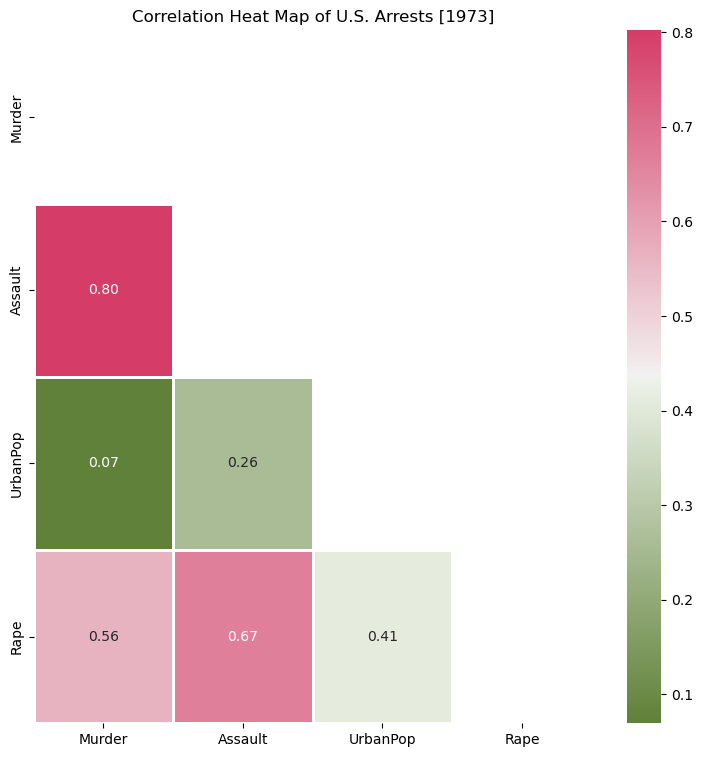

In [143]:
# Standardize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, 1:])

colormap = sns.diverging_palette(111, 1, as_cmap=True)

def corr_heatmap(df):
  # get correlations
  corrs = df.corr()

  # pick appropriate palette for heatmap

  # Plot figsize
  fig, ax = plt.subplots(figsize=(9, 9))

  # to mask mirrored side of heatmap
  dropSelf = np.zeros_like(corrs)
  dropSelf[np.triu_indices_from(dropSelf)] = True

  # Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
  ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

  plt.title('Correlation Heat Map of U.S. Arrests [1973]')
  plt.show()

corr_heatmap(df)

    Weirdly, the above redone 'scaled' heatmap is identical in values to the 'unscaled' heatmap preceding. This indicates that I either, made an error in scaling or other factors (that I read on the internet) such as the small size of the data-points reduce the effect of scaling on the dataset. 

# Below is a boxplot of the crime which emphasises the relative influence of the independent variables visually.

<AxesSubplot:title={'center':'Box Plot of the Factors Influencing the Crime Dataset for U.S. [1973]'}, ylabel='Crime Rate'>

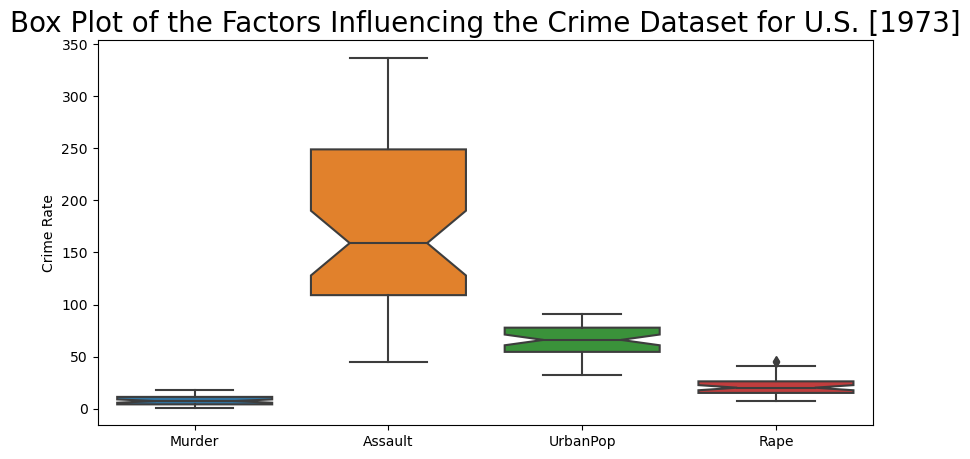

In [169]:
#df_box = df.drop(['UrbanPop'], axis=1) #<== initially I dropped the 'UrbanPop' column
df_box = df
plt.figure(figsize=(10,5))
plt.ylabel('Crime Rate')
plt.title('Box Plot of the Factors Influencing the Crime Dataset for U.S. [1973]', fontsize=20)
sns.boxplot(data=df_box, notch=True)

    The above boxplot again shows the dominance of the 'Assault' column, relative to the other columns in the dataset.

# The below output shows 'Standard Deviation' values for the dataset. The 'Standard Deviation' influence that each column exerts on the dataset which is a precursor to Principle Component Analysis 'PCA'.

In [145]:
# Calculate the standard deviation for each column
std = X.std()       ##<== 'X' is a variable that has been assigned the dataset values except for the 'States' column.

# Create a table with the column names and standard deviations
dev_table = pd.DataFrame({"Column": X.columns, "Standard Deviation": std})

# Print the table
print(dev_table)

            Column  Standard Deviation
Murder      Murder            4.355510
Assault    Assault           83.337661
UrbanPop  UrbanPop           14.474763
Rape          Rape            9.366385


    The above 'standard deviation' table again shows the huge influence of the 'Assault' values in the dataset.

    Surprisingly, the 'Murder' values are the weakest in the dataset, although this can feel strange because 'Murder' and 'Rape' are the most serious crimes and emotionally would seem more significant.

## OBJECTIVE

-------------------------------------------------------------------------------------------------------------------------------------------- 
 TASK INSTRUCTIONS (in the pdf header) :

-- start --

  For this Capstone project, we are **first** going to perform **clustering** techniques on the dataset provided and analyse which method is the best. 
 
  **Secondly**, we will perform **PCA** on our dataset to investigate if it helps the clustering of the observations.

  -- end --

--------------------------------------------------------------------------------------------------------------------------------------------

    Do the above task instructions indicate that the PCA should come after the clustering?

Based on this website, I would perform PCA first to (potentially) inform K-means clustering on the dataset:

    https://stats.stackexchange.com/questions/157621/how-would-pca-help-with-a-k-means-clustering-analysis#:~:text=So%20the%20current%20answers%3A%20Doing%20PCA%20before%20clustering,the%20clustering%20algorithm%20%28reference%3A%20Kernel%20principal%20component%20analysis%29.

    The above mentioned website says;

"Based on some examples (cf., this blog post: PCA and K-means Clustering of Delta Aircraft), I figured out the way to do the analysis is:

1 - First do PCA analysis.

2 - Determine the number of unique groups (clusters) based on PCA results (e.g., using the "elbow" method, or alternatively, the number of components that explains 80 to 90% of total variance).

3 - After determining the number of clusters, apply k-means clustering to do the classification."

... this website also indicates that PCA reveals the need for clustering:

    https://stats.stackexchange.com/questions/235946/pca-before-cluster-analysis

So, I will perform PCA without clustering, although the lecturer indicated the opposite for Task 51.

--------------------------------------------------------------------------------------------------------------------------------------------
Task Instructions (in the pdf task footer) :

● Use the dataset UsArrests.csv included in this folder to generate a similar in-depth PCA report of the data. Explore as much as you can, motivate the pre-processing steps you take, and interpret the outcomes of any analyses.

● You are also required to do an application of two clustering techniques and an analysis of the clusters they generate. Try and see if you can find anything common within each cluster that has been found.

● Push all the work that you have generated for this project to GitHub.

--------------------------------------------------------------------------------------------------------------------------------------------

## STANDARDISATION

    Standardisation is appropriate for the data because most of the figures are numbers representing total figures but the 'UrbanPop' figure is a percentage of the population.

    Because there are different types of values in the figures, the figures need to be standardised.

Below, I standardise the dataset but not the 'State' column because this is the dependent value, it is a container for the other independent values.

In [146]:
# Standardize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, 1:])

## PCA - PRINCIPAL COMPONENT ANALYSIS

    Below, I perform PCA on the dataset, as I am confused when to apply this.

    The graph below shows the elbow in the dataset to inform which clustering value to use.

    "What Is Principal Component Analysis? Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set."
    viz : 
    https://builtin.com/data-science/step-step-explanation-principal-component-analysis#:~:text=What%20Is%20Principal%20Component%20Analysis%3F%20Principal%20Component%20Analysis%2C,most%20of%20the%20information%20in%20the%20large%20set.

# PRINT A PCA TABLE

In [147]:
# Print PCA table
X_pca = df_scaled

# Create a table with the PCA results
pca_table = pd.DataFrame(data = X_pca, columns = ["PC1", "PC2", "PC3", "PC4"])
pca_table["State"] = df["State"]
pca_table["Murder"] = df["Murder"]
pca_table["Assault"] = df["Assault"]
pca_table["UrbanPop"] = df["UrbanPop"]
pca_table["Rape"] = df["Rape"]

# Print the table
print(pca_table)

         PC1       PC2       PC3       PC4           State  Murder  Assault  \
0   1.255179  0.790787 -0.526195 -0.003451         Alabama    13.2    236.0   
1   0.513019  1.118060 -1.224067  2.509424          Alaska    10.0    263.0   
2   0.072361  1.493817  1.009122  1.053466         Arizona     8.1    294.0   
3   0.234708  0.233212 -1.084492 -0.186794        Arkansas     8.8    190.0   
4   0.281093  1.275635  1.776781  2.088814      California     9.0    276.0   
5   0.025976  0.402909  0.869548  1.883901        Colorado     7.9    204.0   
6  -1.040880 -0.736484  0.799761 -1.092723     Connecticut     3.3    110.0   
7  -0.437875  0.815030  0.450825 -0.585834        Delaware     5.9    238.0   
8   1.765415  1.990786  1.009122  1.150530         Florida    15.4    335.0   
9   2.229265  0.487757 -0.386621  0.492653         Georgia    17.4    211.0   
10 -0.577030 -1.512241  1.218484 -0.111300          Hawaii     5.3     46.0   
11 -1.203228 -0.615272 -0.805344 -0.758392          

    The above PCA table shows a lot of information.

# INTERPRET THE PCA TABLE WITH A VISUAL TOOL: A SCREE PLOT.

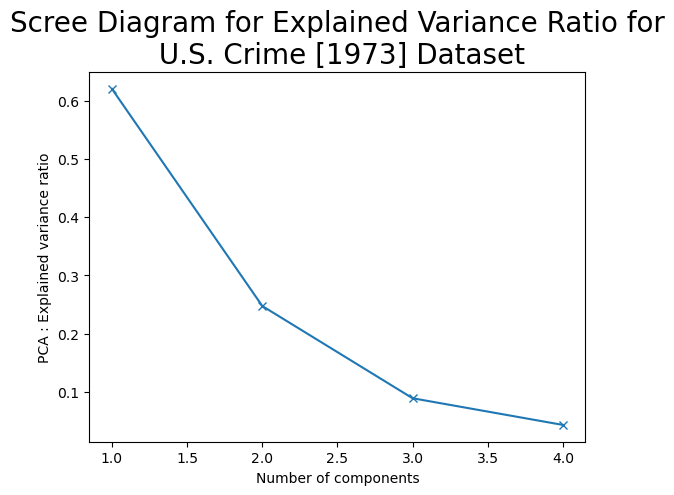

Number of components that explain 90% of the variance: 3


In [148]:
# Plot the scree plot to see the explained variance ratio of each principal component
# CODE FROM :
## https://stackoverflow.com/questions/57293716/sklearn-pca-explained-variance-and-explained-variance-ratio-difference

# Perform PCA
pca = PCA()
pca.fit(df_scaled)

# Get the explained variance ratio
evr = pca.explained_variance_ratio_

# Plot the scree plot
plt.plot(np.arange(1, len(evr) + 1), evr, marker='x')
plt.xlabel('Number of components')
plt.ylabel('PCA : Explained variance ratio')
plt.title('Scree Diagram for Explained Variance Ratio for\n U.S. Crime [1973] Dataset', fontsize=20)
plt.show()

# Get the cumulative sum of the explained variance ratio
cum_evr = np.cumsum(evr)

# Find the number of components that explain 90% of the variance
n_components = np.where(cum_evr >= 0.9)[0][0] + 1
print(f'Number of components that explain 90% of the variance: {n_components}')

    The Scree graph above indicates that I can get 90% of the data with 3 columns out of 4, approx. 75% of the dataset.

# INTERPRET THE PCA TABLE WITH A VISUAL TOOL: AN EXPLAINED VARIANCE GRAPH.

Number of components that explain 90% of the variance: 3


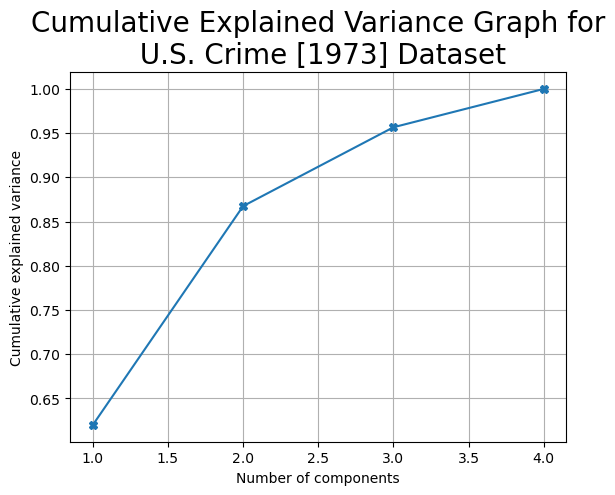

In [149]:
# Calculate cumulative sum
cum_var = np.cumsum(evr)

# Plot cumulative sum
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='X')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance Graph for\n U.S. Crime [1973] Dataset', fontsize=20)

# Find the number of components that explain 90% of the variance
n_components = np.where(cum_var >= 0.9)[0][0] + 1
print(f'Number of components that explain 90% of the variance: {n_components}')

plt.grid()
plt.show()

    The scree plot shows that the first two principal components explain about 86% of the total variance, but I can get over 95% of the total variance with 3 components, which sounds better to me.

# INTERPRET THE PCA TABLE WITH A VISUAL TOOL: A BIPLOT.

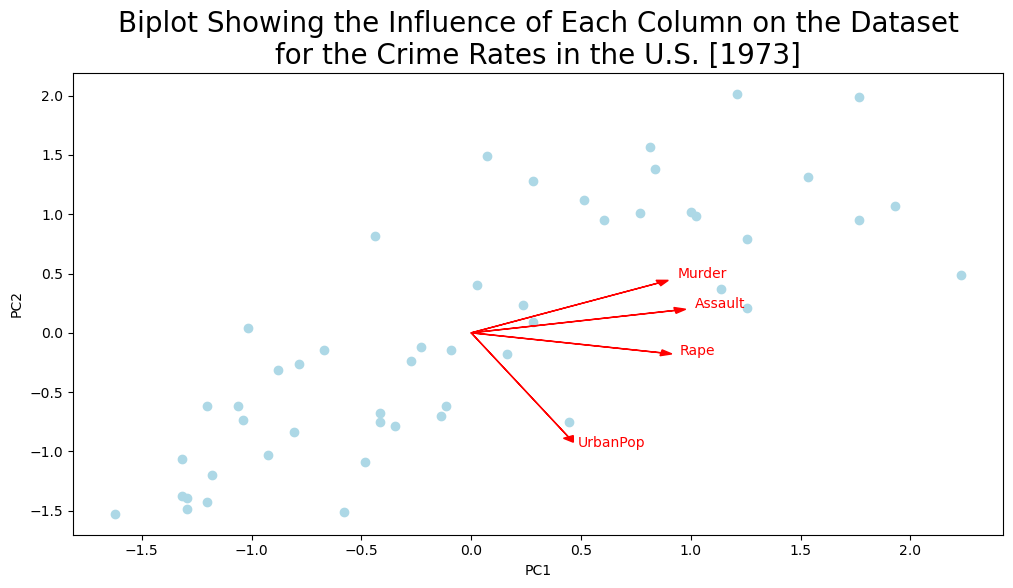

In [150]:
# Plot the biplot to see the projection of the original variables and the observations on the first two principal components
plt.figure(figsize=(12, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c="lightblue")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Biplot Showing the Influence of Each Column on the Dataset\nfor the Crime Rates in the U.S. [1973]", fontsize=20)
# Get the loadings of the original variables on the first two principal components
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Plot the loadings as vectors
for i, j, k in zip(loadings[:, 0], loadings[:, 1], df.columns[1:]):
    plt.arrow(0, 0, i, j, color="red", head_width=0.05, head_length=0.05)
    plt.text(i * 1.1, j * 1.1, k, color="red")

plt.show()

    The biplot shows that PC1 has a strong, 'positive' correlation with 'murder, assault and rape', and a weak 'positive' correlation with 'urban population'.

    PC2 is weakly, 'positively' correlated with 'murder and assault' and negatively correlated with 'urban population' and less so with 'rape'.

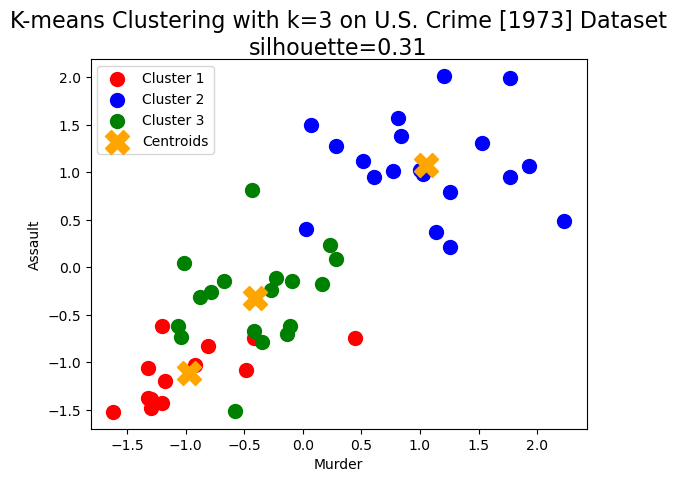

In [151]:
# create new variable to make it less confusing
X = df_scaled

# Choose k = 3 as the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
y_pred = kmeans.fit_predict(X)

# Plot the clusters
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s = 300, c = 'orange', label = 'Centroids')
plt.xlabel('Murder')
plt.ylabel('Assault')

# THIS SILHOUETTE CODE WAS PROVIDED IN A PREVIOUS TASK ipynb FILE
score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)
plt.title("K-means Clustering with k=3 on U.S. Crime [1973] Dataset\nsilhouette={}".format(score), fontdict={'fontsize': 16}, pad=-14 )

plt.legend()
plt.show()

     The above K-means scatter plot shows the centroids at the centre of 3-clusters.

     However, the above graph does not look quite right. Because the green and red groups look intermingled with a green dot far into the red side and vice versa.

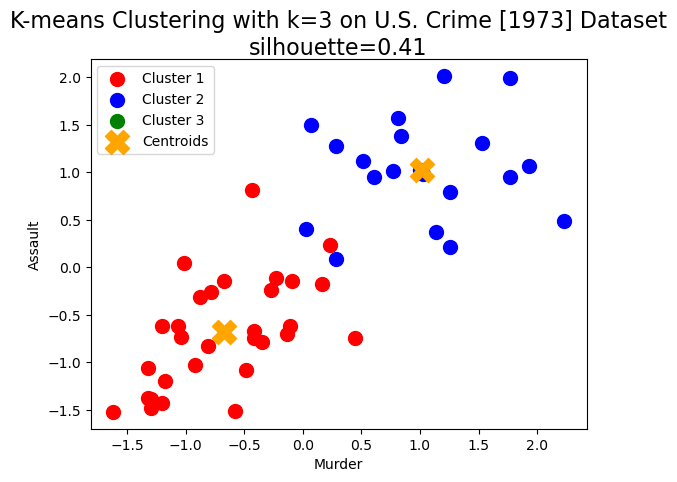

In [152]:
# Choose k = 2 as the optimal number of clusters
kmeans = KMeans(n_clusters=2, random_state=0)
y_pred = kmeans.fit_predict(X)

# Plot the clusters
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s = 300, c = 'orange', label = 'Centroids')
plt.xlabel('Murder')
plt.ylabel('Assault')

# THIS SILHOUETTE CODE WAS PROVIDED IN A PREVIOUS TASK ipynb FILE
score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)
plt.title("K-means Clustering with k=3 on U.S. Crime [1973] Dataset\nsilhouette={}".format(score), fontdict={'fontsize': 16}, pad=-14 )

plt.legend()
plt.show()

     The above K-means scatter plot shows the centroids at the centre of 2-clusters.

     The above 2-cluster graph looks better than the 3-cluster because there is a less significant overlap between the red and blue groups.

     The silhouette score (0.41) for the 2-cluster scatter plot is higher than (0.31) for the 3-cluster scatter plot.

The follow-on question to the above K-Means clustering graphs, is if either the appearance of the graphs or the silhouette score should influence a choice between 2 or 3 clusters? 

## PCA Conclusion

    Although it seems logical to use more of the dataset with 3-clusters and 96% of the data, based on the above K-Means graphs and silhouette score, I will choose 2-clusters instead of 3, going forward.

This website :

https://stephenallwright.com/good-clustering-metrics/

Indicates that it is difficult to interpret clusters, other than visually, although metrics such as a silhouette score are relatively easy to interpret because they create a value between 1 and -1.

# Following on from K-Means Clustering and PCA :

## Hierarchical Clustering Analysis with Dendrograms

Text(0.5, 1.0, "Crime Rate Dendrogram on U.S. Crime [1973] Dataset Using the 'Single' Method\nsilhouette=0.2891273625299761")

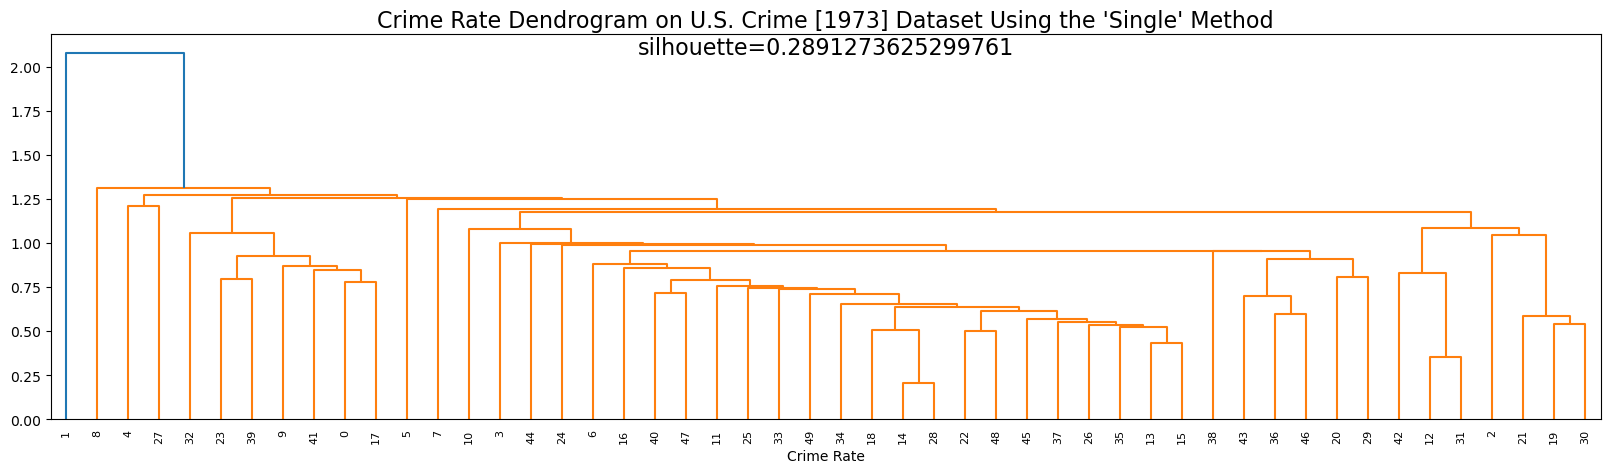

In [154]:
# sch = scipy.cluster.hierachy
plt.figure(figsize=(20,5))
dend = sch.dendrogram(sch.linkage(df_scaled, method='single'))
plt.xlabel('Crime Rate')

my_model = KMeans().fit(X)
labels = my_model.labels_
score = silhouette_score(X,labels)
plt.title("Crime Rate Dendrogram on U.S. Crime [1973] Dataset Using the 'Single' Method\nsilhouette={}".format(score), 
    fontdict={'fontsize': 16}, pad=-14 )

    The above Dendrogram for the 'Single' method shows a single cluster with a relatively high silhouette score.

Text(0.5, 1.0, "Crime Rate Dendrogram on U.S. Crime [1973] Dataset Using the 'Complete' Method\nsilhouette=0.2781357167844073")

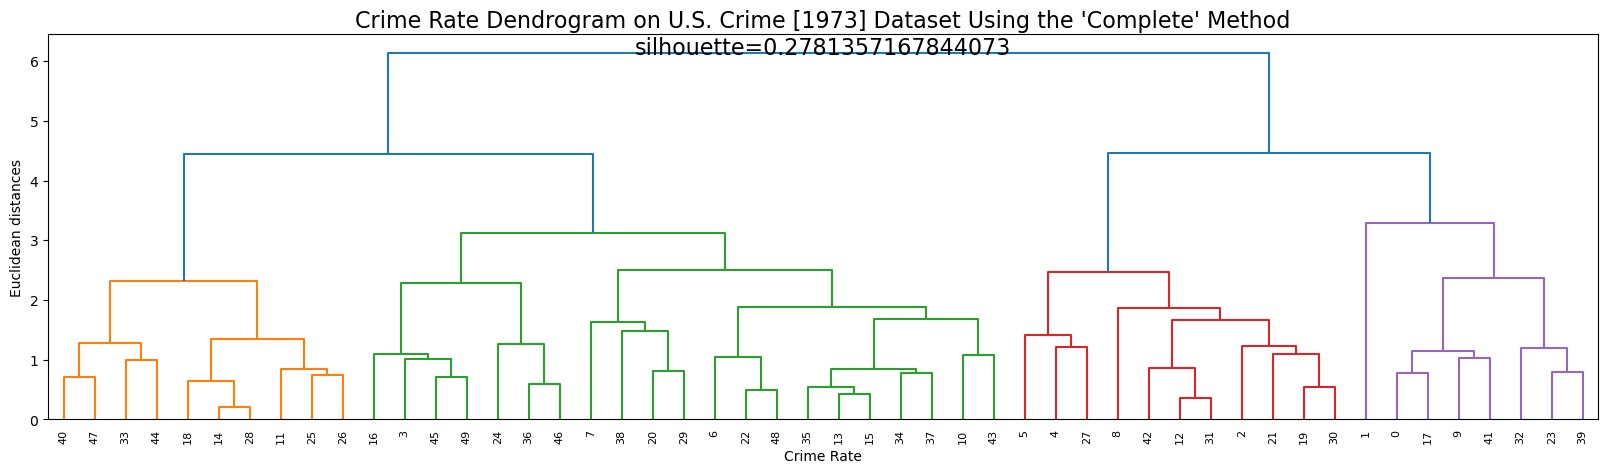

In [155]:
plt.figure(figsize=(20,5))
dend = sch.dendrogram(sch.linkage(df_scaled, method='complete'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

my_model = KMeans().fit(X)
labels = my_model.labels_
score = silhouette_score(X,labels)
plt.title("Crime Rate Dendrogram on U.S. Crime [1973] Dataset Using the 'Complete' Method\nsilhouette={}".format(score), 
    fontdict={'fontsize': 16}, pad=-14 )

    The above Dendrogram for the 'Complete' method shows 4-clusters with a silhouette score marginally below the 'Single' method.

Text(0.5, 1.0, "Crime Rate Dendrogram on U.S. Crime [1973] Dataset Using the 'Average' Method\nsilhouette=0.24871276654778357")

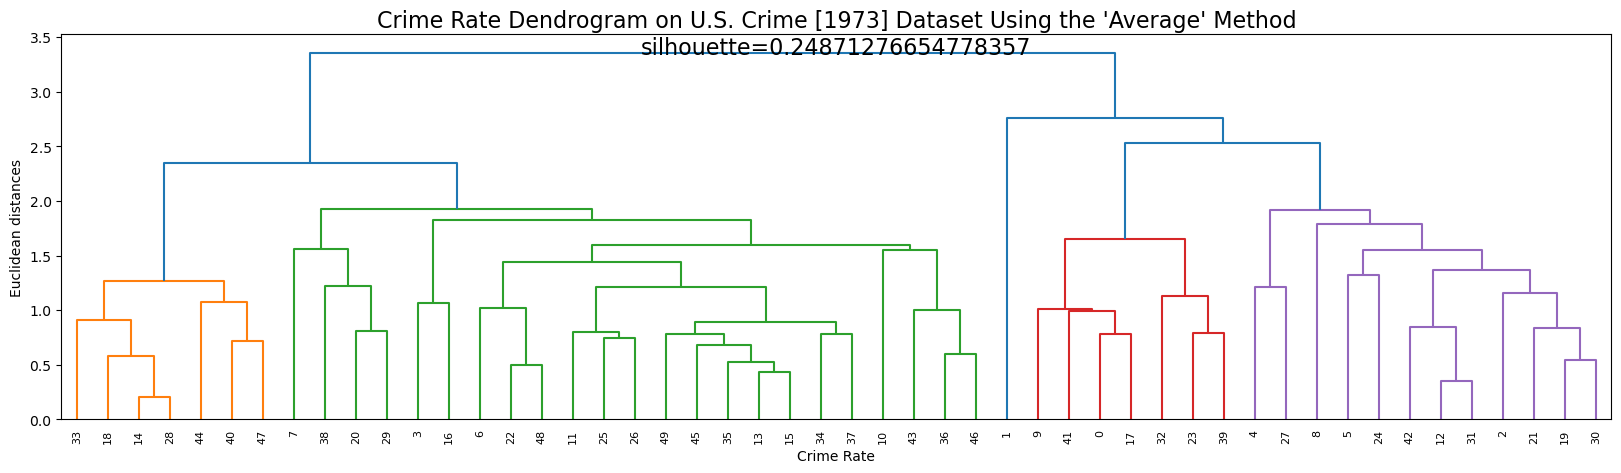

In [156]:
plt.figure(figsize=(20,5))
dend = sch.dendrogram(sch.linkage(df_scaled, method='average'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

my_model = KMeans().fit(X)
labels = my_model.labels_
score = silhouette_score(X,labels)
plt.title("Crime Rate Dendrogram on U.S. Crime [1973] Dataset Using the 'Average' Method\nsilhouette={}".format(score), 
    fontdict={'fontsize': 16}, pad=-14 )

    The above Dendrogram for the 'Average' method shows 4-clusters with a lower silhouette score than either the; 'Single' or 'Complete' method.

Text(0.5, 1.0, "Crime Rate Dendrogram on U.S. Crime [1973] Dataset Using the 'Ward' Method\nsilhouette=0.2811090536340113")

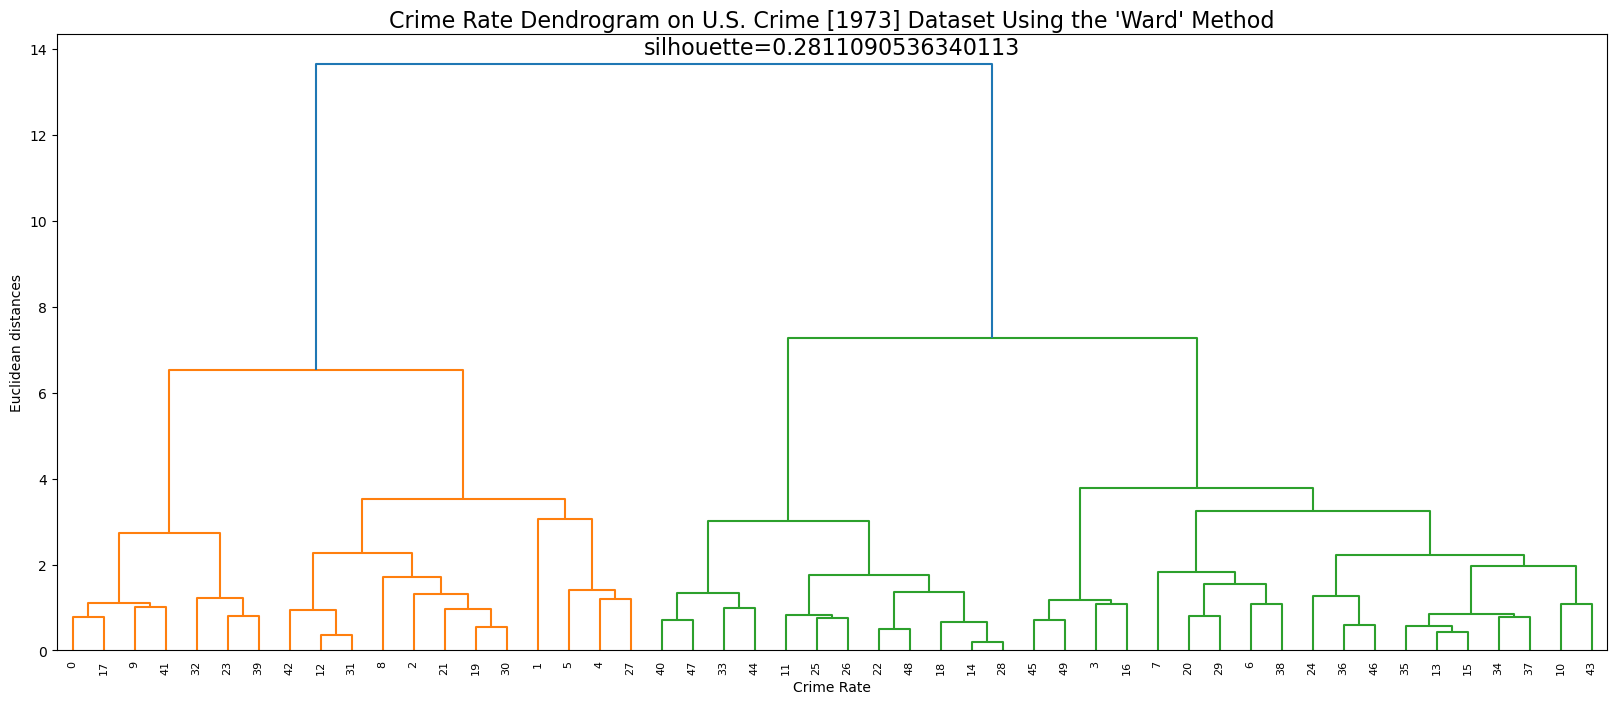

In [157]:
# With Ward method
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method  = "ward"))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')
#plt.show()

my_model = KMeans().fit(X)
labels = my_model.labels_
score = silhouette_score(X,labels)
plt.title("Crime Rate Dendrogram on U.S. Crime [1973] Dataset Using the 'Ward' Method\nsilhouette={}".format(score), 
    fontdict={'fontsize': 16}, pad=-14 )

    The above Dendrogram for the 'Ward' method shows a double cluster with a relatively high silhouette score on par with the 'Single' method and higher than the 'Average' and 'Complete' method.

    The above Dendrogram has 2-clusters which I conclude would be optimal for Machine Learning from the USArrests.csv dataset.

Where to Cut a Dendrogram? : https://stats.stackexchange.com/questions/3685/where-to-cut-a-dendrogram

    The above referenced website indicates being visually guided by the Dendrogram.

--------------------------------------------------------------------------------------------------------------------------------------------
Task Instructions :

● You are also required to do an application of two clustering techniques and an analysis of the clusters they generate. Try and see if you can find anything common within each cluster that has been found.

● Push all the work that you have generated for this project to GitHub.

--------------------------------------------------------------------------------------------------------------------------------------------

    Conclusion :

    The commonality between the K-Means Clustering and Hierarchical Clustering Dendrograms are the surprise (to me) that choosing 2-clusters instead of 3-clusters produces a mathematically higher silhouette score.

    The importance of the silhouette score is that it can be easier to interpret than purely visual cues from a cluster or dendrogram. However the silhouette score is not determinate because it is based on a formula which is not appropriate in every situation.

    For Machine Learning purposes, using the USArrests dataset, 2-clusters would appear to be optimal even though 2-clusters would exclude a significant part of the dataset, circa 15%.

    A logical conclusion, from the minimal span of the dataset, is that some factors are significantly less signifcant in criminality.

    From, the Biplot above it can be seen that the weakest influence was the size of the Urban Population, which would seem counter-intuitive as people often flee larger settlements for a more peaceful, rural idyll.

    A reasonable conclusion from the analysis is that crime begets crime and criminality undermines law & order, or this is a hypothesis that can be explored in data analysis.

(ref: Task Instructions: Github is the next lesson, projects will be uploaded to Github ASAP.)